#PRODIGY INFOTECH DATA SCIENCE INTERNSHIP - TASK 3
#Building a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data

##Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Load the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_purchase_data.csv to customer_purchase_data.csv


In [ ]:
df = pd.read_csv('customer_purchase_data.csv')
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


##Understand the data

In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


##Feature & Target Split

In [ ]:
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']

##Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##Train Decision Tree Model

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

##Predictions & Evaluation

In [ ]:
y_pred = dt.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8533333333333334

Confusion Matrix:
 [[145  25]
 [ 19 111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       170
           1       0.82      0.85      0.83       130

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



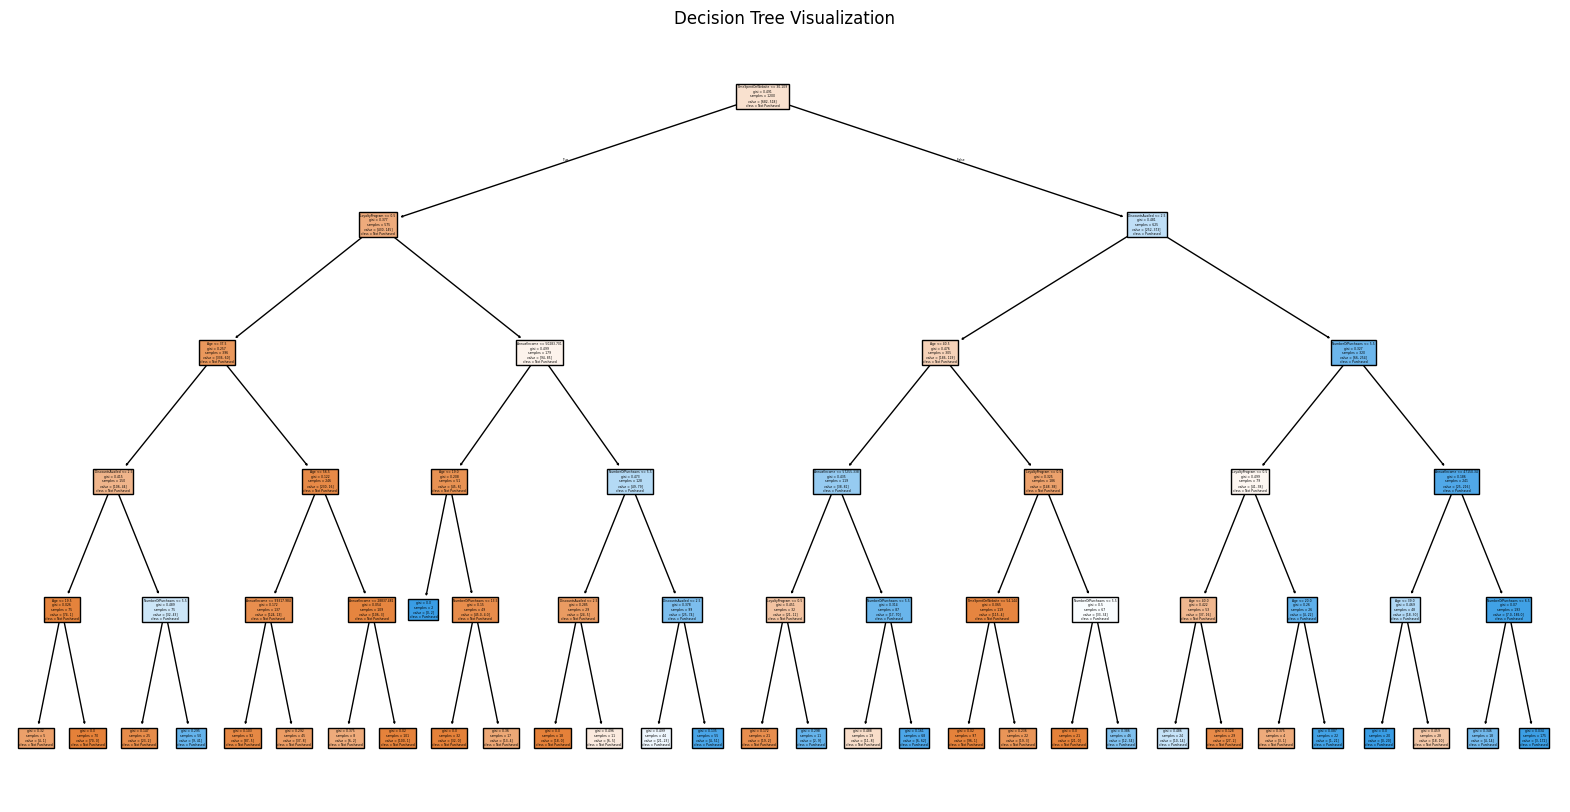

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

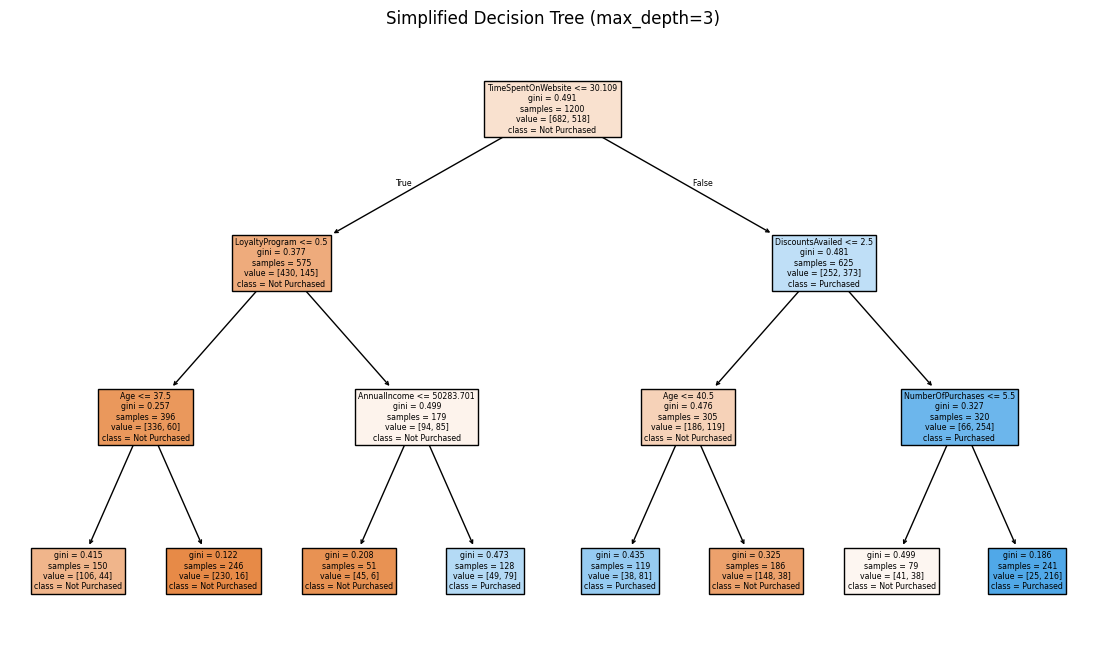

In [ ]:
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)
plt.figure(figsize=(14, 8))
plot_tree(dt_pruned, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title("Simplified Decision Tree (max_depth=3)")
plt.savefig("decision_tree_pruned.png", dpi=300, bbox_inches='tight')
plt.show()

##Feature importance bar plot

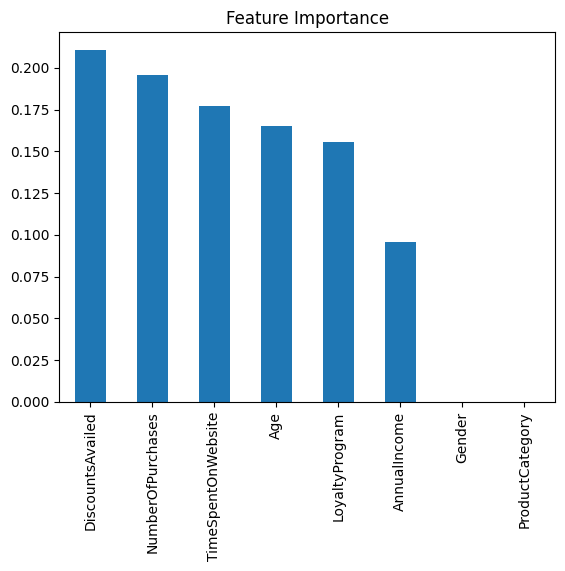

In [ ]:
pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.savefig("feature_tree_pruned.png", dpi=300, bbox_inches='tight')
plt.show()

##Decision boundary plot

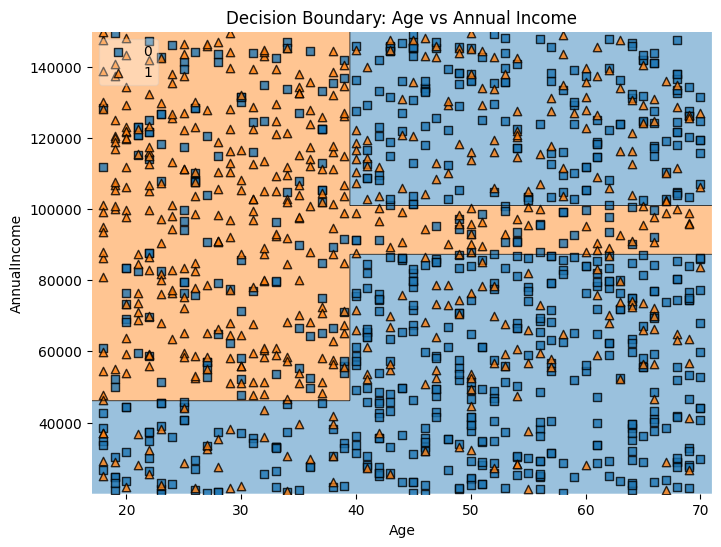

In [ ]:
X_2feat = X[['Age', 'AnnualIncome']].to_numpy()
y_array = y.to_numpy()
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2feat, y_array, test_size=0.2, random_state=42)
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_2, y_train_2)
plt.figure(figsize=(8,6))
plot_decision_regions(X_train_2, y_train_2, clf=clf2, legend=2)
plt.xlabel('Age')
plt.ylabel('AnnualIncome')
plt.title('Decision Boundary: Age vs Annual Income')
plt.show()

##Summary of tree

In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(dt, feature_names=list(X.columns))
print(tree_rules)

|--- TimeSpentOnWebsite <= 30.11
|   |--- LoyaltyProgram <= 0.50
|   |   |--- Age <= 37.50
|   |   |   |--- DiscountsAvailed <= 2.50
|   |   |   |   |--- Age <= 19.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  19.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- DiscountsAvailed >  2.50
|   |   |   |   |--- NumberOfPurchases <= 5.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- NumberOfPurchases >  5.50
|   |   |   |   |   |--- class: 1
|   |   |--- Age >  37.50
|   |   |   |--- Age <= 56.50
|   |   |   |   |--- AnnualIncome <= 99317.98
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- AnnualIncome >  99317.98
|   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  56.50
|   |   |   |   |--- AnnualIncome <= 28837.48
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- AnnualIncome >  28837.48
|   |   |   |   |   |--- class: 0
|   |--- LoyaltyProgram >  0.50
|   |   |--- AnnualIncome <= 50283.70
|   |   |   |--- Age <= 19.00
|   |   |   |   |--- 